# Part B: Data Insights Experiment
### Nikita Jagtiani

#### Datasets:
    Car_Detail
    Median_Household_Incomes
#### Hypothesis:
    Popularity of vehicle styles is correlated with median household incomes.
#### Details:
    My reasoning behind choosing this hypothesis is that people who have higher incomes tend to buy more cars.  Cars such as convertibles are not practical for everyday use, especially in changing weather conditions or for families with kids.  Lower income people would most likely steer towards purchasing a practical car style such as a sedan or SUV.  Only data from 2000-2017 was used because certain vehicle styles did not have data for earlier years.  Also, this may reduce the occurrence of possible confounding variables from the 20th to the 21st century.  The vehicle styles chosen were 4 door SUV, convertible, and sedan since these are 3 of the most commonly known car styles and they vary in size and purpose.  The median household incomes per year were used to get an overall mean of the medians for that year based on the states provided.  The mean will give a general overview of the correlation between the two.  To attempt to look at more specific combinations of values, the household incomes from Colorado and New York were also tested to see if there was any variation by state.
#### Conclusion:
    Based on data from 2000 to 2017,  the results were only statistically significant when comparing the Mean of Median Incomes vs. 4 door SUV Popularity and Mean of Median Incomes vs. Sedan Popularity.  The Mean of Median Incomes vs. Convertible was not statistically significant.  4 door SUV Popularity is 22.2% correlated to the Mean of Median Incomes, respective to the year.  Sedan Popularity is 56.4% correlated to the Mean of Median Incomes respective, to the year.  Of the three graphs presented below, the lowest variance in the data points occurred when the Mean of Medians was used instead of individual Medians by state.  This could be because it reduces the possibility of bias that is occurring.  However, even for the results that are statistically significant (p>.05), the correlation is positive but it is weak (R<.99) and there is no way to determine if there are confounding variables present.
#### Solution:
    OLS Regression Charts and Scatter Plots below. The comments at the top of each cell go into further detail analyzing that specific piece of data.

In [304]:
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib as mpl 
from mpl_toolkits.mplot3d import Axes3D 

In [305]:
import os

In [306]:
print(os.getcwd())

/Users/nikita


In [307]:
pwd

'/Users/nikita'

In [308]:
#reading in file for Median Household Incomes
data1 = pd.read_csv("Documents/Datasets/Median_Household_Incomes.csv")
data1.head()

,DATE,Median_CA,Median_CO,Median_NY,Median_TX,Median_IN
0,1/1/84,25287,59558,45671,53148,52561
1,1/1/85,26981,62895,47632,52988,50605
2,1/1/86,29010,59642,50116,52996,49851
3,1/1/87,30146,56140,51927,52419,47750
4,1/1/88,30287,53647,51993,51086,53808


In [309]:
#reading in file for Car Deatils
data2 = pd.read_csv("Documents/Datasets/Car_Detail.csv")

In [310]:
#drop duplicates and reformat Car Details Data
data2new = data2.drop_duplicates()
data2new.shape
data2new.to_csv('Documents/Datasets/Car_Detail.csv', index=False)
data2new = pd.read_csv("Documents/Datasets/Car_Detail.csv")
data2new

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11194,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11195,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11196,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11197,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [311]:
#overall house data
B1 = data1[['DATE', 'Median_CA','Median_CO', 'Median_NY', 'Median_TX', 'Median_IN']]
B1.set_index('DATE')

,Median_CA,Median_CO,Median_NY,Median_TX,Median_IN
DATE,,,,,
1/1/84,25287,59558,45671,53148,52561
1/1/85,26981,62895,47632,52988,50605
1/1/86,29010,59642,50116,52996,49851
1/1/87,30146,56140,51927,52419,47750
1/1/88,30287,53647,51993,51086,53808
1/1/89,33009,52560,51147,50756,50780
1/1/90,33290,57428,49864,52747,50318
1/1/91,33664,56793,49136,50003,48842
1/1/92,34903,57148,48114,49177,50192


In [312]:
#remove unneeded years from house income data
B2 = B1.drop(B1.index[0:16])
B2 = B2.drop(B2.index[18])
B2 = B2.reset_index()
del B2['index']
B2.set_index('DATE')
B2

,DATE,Median_CA,Median_CO,Median_NY,Median_TX,Median_IN
0,1/1/00,46816,70538,56817,56456,59754
1,1/1/01,47262,70231,51782,58093,57409
2,1/1/02,47437,67597,53222,56196,57453
3,1/1/03,49300,68349,53338,53747,58064
4,1/1/04,49222,67811,54017,55166,56408
5,1/1/05,51755,65026,55412,53391,54699
6,1/1/06,55319,69537,57026,54068,56690
7,1/1/07,55734,74228,55596,55911,57610
8,1/1/08,57014,71251,52444,54353,54389
9,1/1/09,56134,65618,53535,55699,51980


In [313]:
#table with specific car data
#popularity of vehicle style based on year
#vehicle style narrowed
mask = data2new[(data2new['Vehicle Style'] == '4dr SUV') | (data2new['Vehicle Style'] == 'Coupe') | (data2new['Vehicle Style'] == 'Convertible') 
    |(data2new['Vehicle Style'] == 'Sedan')]
B3 = pd.pivot_table(mask,index =['Year'],values = ['Popularity'], columns=['Vehicle Style'], aggfunc='mean')
B3 = B3.drop(B3.index[0:10])
B3.reset_index(inplace=True)
B3

Year   Popularity                                       
Vehicle Style            4dr SUV  Convertible        Coupe        Sedan
0              2000  1086.400000  1504.714286  1426.666667  1022.409091
1              2001  1069.136364  1608.125000  1846.764706   607.962264
2              2002   936.323529  1711.928571  2176.400000   774.320000
3              2003   505.628571  3138.846154  1478.484848   883.807692
4              2004   597.122449  2370.100000  1126.200000   898.144928
5              2005   554.071429  2207.909091  1075.250000  1280.688525
6              2006   583.222222  1607.857143  1455.592593  1296.550000
7              2007   617.333333  1645.040000  1712.133333  1248.615385
8              2008   646.906250  1427.000000  1465.763158   857.108696
9              2009  1141.440860  1053.925000   849.473684   848.662338
10             2010  1360.909091   537.736842   818.130435   701.953846
11             2011  1225.555556   797.777778  1049.214286   572.883117
12             2012   814.022222   798.269231  1097.085714   421.888889
13             2013   914.807018  1737.818182  1541.325581   602.875000
14             2014  1197.099174  1123.118421  1247.987013  1195.476636
15             2015  1468.929368  1525.335664  1772.857143  1651.654255
16             2016  1509.531624  1715.766667  1884.379121  1592.727575
17             2017  1596.281513  2009.842105  2030.724138  1661.050773

In [314]:
#table for mean of the median incomes by year
dataMMI = {'Year': [2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017],
     'Mean_Median_Income': [58076.2,56955.4,56381,56559.6,56524.8,56056.6,58528,59815.8,57890.2,56593.2,56494,54809,55541.2,59083.8,56481,60184.8,62714,64597.4]}
B4 = pd.DataFrame(data=dataMMI)
B4

,Year,Mean_Median_Income
0,2000,58076.2
1,2001,56955.4
2,2002,56381.0
3,2003,56559.6
4,2004,56524.8
5,2005,56056.6
6,2006,58528.0
7,2007,59815.8
8,2008,57890.2
9,2009,56593.2


In [315]:
#final chart
Bhouse = pd.DataFrame(B4, columns = ['Year'])
Bhouse3 = pd.DataFrame(B4, columns = ['Mean_Median_Income'])
Bhouse2 = pd.DataFrame(B2, columns = ['Median_CO', 'Median_NY'])
Bcar = pd.DataFrame(B3, columns = [B3.columns[1],B3.columns[2],B3.columns[4]])
Bfinal = pd.concat([Bhouse,Bhouse2,Bcar, Bhouse3], axis=1)
Bfinal

,Year,Median_CO,Median_NY,"(Popularity, 4dr SUV)","(Popularity, Convertible)","(Popularity, Sedan)",Mean_Median_Income
0,2000,70538,56817,1086.400000,1504.714286,1022.409091,58076.2
1,2001,70231,51782,1069.136364,1608.125000,607.962264,56955.4
2,2002,67597,53222,936.323529,1711.928571,774.320000,56381.0
3,2003,68349,53338,505.628571,3138.846154,883.807692,56559.6
4,2004,67811,54017,597.122449,2370.100000,898.144928,56524.8
5,2005,65026,55412,554.071429,2207.909091,1280.688525,56056.6
6,2006,69537,57026,583.222222,1607.857143,1296.550000,58528.0
7,2007,74228,55596,617.333333,1645.040000,1248.615385,59815.8
8,2008,71251,52444,646.906250,1427.000000,857.108696,57890.2
9,2009,65618,53535,1141.440860,1053.925000,848.662338,56593.2


In [316]:
#regression statistics --- Median_CO vs. 4 door SUV
#results are insignificant - R^2 = .085, P = .242
X1 = Bfinal[Bfinal.columns[1]]
Y1 = Bfinal[Bfinal.columns[3]]
X1 = sm.add_constant(X1)
data1 = sm.OLS(Y1, X1)
results1 = data1.fit()
print(results1.summary())

                                OLS Regression Results                               
Dep. Variable:     ('Popularity', '4dr SUV')   R-squared:                       0.085
Model:                                   OLS   Adj. R-squared:                  0.027
Method:                        Least Squares   F-statistic:                     1.479
Date:                       Tue, 14 Jan 2020   Prob (F-statistic):              0.242
Time:                               20:24:14   Log-Likelihood:                -130.09
No. Observations:                         18   AIC:                             264.2
Df Residuals:                             16   BIC:                             266.0
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

In [317]:
#regression statistics --- Median_NY vs. 4 door SUV
#results are insignificant - R^2 = .131, P = .140
X2 = Bfinal[Bfinal.columns[2]]
Y2 = Bfinal[Bfinal.columns[3]]
X2 = sm.add_constant(X2)
data2 = sm.OLS(Y2, X2)
results2 = data2.fit()
print(results2.summary())

                                OLS Regression Results                               
Dep. Variable:     ('Popularity', '4dr SUV')   R-squared:                       0.131
Model:                                   OLS   Adj. R-squared:                  0.077
Method:                        Least Squares   F-statistic:                     2.411
Date:                       Tue, 14 Jan 2020   Prob (F-statistic):              0.140
Time:                               20:24:14   Log-Likelihood:                -129.63
No. Observations:                         18   AIC:                             263.3
Df Residuals:                             16   BIC:                             265.0
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

In [318]:
#regression statistics --- Median_CO vs. Convertible
#results were insignificant - R^2 = .072, P = .282
X3 = Bfinal[Bfinal.columns[1]]
Y3 = Bfinal[Bfinal.columns[4]]
X3 = sm.add_constant(X3)
data3 = sm.OLS(Y3, X3)
results3 = data3.fit()
print(results3.summary())

                                  OLS Regression Results                                 
Dep. Variable:     ('Popularity', 'Convertible')   R-squared:                       0.072
Model:                                       OLS   Adj. R-squared:                  0.014
Method:                            Least Squares   F-statistic:                     1.239
Date:                           Tue, 14 Jan 2020   Prob (F-statistic):              0.282
Time:                                   20:24:14   Log-Likelihood:                -140.08
No. Observations:                             18   AIC:                             284.2
Df Residuals:                                 16   BIC:                             285.9
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------

In [319]:
#regression statistics --- Median_NY vs. Convertible
#results are significant but correlation is weak - R^2 = .232, P = .043
X4 = Bfinal[Bfinal.columns[2]]
Y4 = Bfinal[Bfinal.columns[4]]
X4 = sm.add_constant(X4)
data4 = sm.OLS(Y4, X4)
results4 = data4.fit()
print(results4.summary())

                                  OLS Regression Results                                 
Dep. Variable:     ('Popularity', 'Convertible')   R-squared:                       0.232
Model:                                       OLS   Adj. R-squared:                  0.184
Method:                            Least Squares   F-statistic:                     4.844
Date:                           Tue, 14 Jan 2020   Prob (F-statistic):             0.0428
Time:                                   20:24:14   Log-Likelihood:                -138.37
No. Observations:                             18   AIC:                             280.7
Df Residuals:                                 16   BIC:                             282.5
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------

In [320]:
#regression statistics --- Median_CO vs. Sedan
#results are significant but correlation is weak - R^2 = .372, P = .004
X5 = Bfinal[Bfinal.columns[1]]
Y5 = Bfinal[Bfinal.columns[5]]
X5 = sm.add_constant(X5)
data5 = sm.OLS(Y5, X5)
results5 = data5.fit()
print(results5.summary())

                               OLS Regression Results                              
Dep. Variable:     ('Popularity', 'Sedan')   R-squared:                       0.237
Model:                                 OLS   Adj. R-squared:                  0.189
Method:                      Least Squares   F-statistic:                     4.971
Date:                     Tue, 14 Jan 2020   Prob (F-statistic):             0.0405
Time:                             20:24:14   Log-Likelihood:                -129.73
No. Observations:                       18   AIC:                             263.5
Df Residuals:                           16   BIC:                             265.2
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
co

In [321]:
#regression statistics --- Median_NY vs. Sedan
#results are insignificant - R^2 = .166, P = .093
X6 = Bfinal[Bfinal.columns[2]]
Y6 = Bfinal[Bfinal.columns[5]]
X6 = sm.add_constant(X6)
data6 = sm.OLS(Y6, X6)
results6 = data6.fit()
print(results6.summary())

                               OLS Regression Results                              
Dep. Variable:     ('Popularity', 'Sedan')   R-squared:                       0.166
Model:                                 OLS   Adj. R-squared:                  0.114
Method:                      Least Squares   F-statistic:                     3.193
Date:                     Tue, 14 Jan 2020   Prob (F-statistic):             0.0929
Time:                             20:24:14   Log-Likelihood:                -130.53
No. Observations:                       18   AIC:                             265.1
Df Residuals:                           16   BIC:                             266.8
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
co

In [322]:
#regression statistics --- Mean_Median vs. 4 Door SUV
#results are significant but correlation is weak - R^2 = .222, P = .048
X7 = Bfinal[Bfinal.columns[6]]
Y7 = Bfinal[Bfinal.columns[3]]
X7 = sm.add_constant(X7)
data7 = sm.OLS(Y7, X7)
results7 = data7.fit()
print(results7.summary())

                                OLS Regression Results                               
Dep. Variable:     ('Popularity', '4dr SUV')   R-squared:                       0.222
Model:                                   OLS   Adj. R-squared:                  0.173
Method:                        Least Squares   F-statistic:                     4.564
Date:                       Tue, 14 Jan 2020   Prob (F-statistic):             0.0485
Time:                               20:24:14   Log-Likelihood:                -128.63
No. Observations:                         18   AIC:                             261.3
Df Residuals:                             16   BIC:                             263.0
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

In [323]:
#regression statistics --- Mean_Median vs. Convertible
#results are insignificant - R^2 = .054, P = .353
X8 = Bfinal[Bfinal.columns[6]]
Y8 = Bfinal[Bfinal.columns[4]]
X8 = sm.add_constant(X8)
data8 = sm.OLS(Y8, X8)
results8 = data8.fit()
print(results8.summary())

                                  OLS Regression Results                                 
Dep. Variable:     ('Popularity', 'Convertible')   R-squared:                       0.054
Model:                                       OLS   Adj. R-squared:                 -0.005
Method:                            Least Squares   F-statistic:                    0.9140
Date:                           Tue, 14 Jan 2020   Prob (F-statistic):              0.353
Time:                                   20:24:14   Log-Likelihood:                -140.25
No. Observations:                             18   AIC:                             284.5
Df Residuals:                                 16   BIC:                             286.3
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------

In [324]:
#regression statistics --- Mean_Median vs. Sedan
#results are significant but correlation is weak - R^2 = .564, P = .000
X9 = Bfinal[Bfinal.columns[6]]
Y9 = Bfinal[Bfinal.columns[5]]
X9 = sm.add_constant(X8)
data9 = sm.OLS(Y9, X9)
results9 = data9.fit()
print(results9.summary())

                               OLS Regression Results                              
Dep. Variable:     ('Popularity', 'Sedan')   R-squared:                       0.564
Model:                                 OLS   Adj. R-squared:                  0.537
Method:                      Least Squares   F-statistic:                     20.68
Date:                     Tue, 14 Jan 2020   Prob (F-statistic):           0.000330
Time:                             20:24:15   Log-Likelihood:                -124.70
No. Observations:                       18   AIC:                             253.4
Df Residuals:                           16   BIC:                             255.2
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

Text(0, 0.5, 'Popularity Per Year')

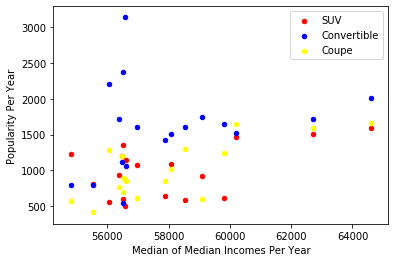

In [325]:
#scatter plot for Mean of Median Incomes Per Year vs. Popularity Per Year
ax = Bfinal.plot(kind='scatter', x='Mean_Median_Income', y=Bfinal.columns[3], color='Red', label='SUV')
ax = Bfinal.plot(kind='scatter', x='Mean_Median_Income', y=Bfinal.columns[4], color='Blue', label='Convertible',ax=ax)
ax = Bfinal.plot(kind='scatter', x='Mean_Median_Income', y=Bfinal.columns[5], color='Yellow', label='Coupe',ax=ax)
ax.set_xlabel("Median of Median Incomes Per Year")
ax.set_ylabel("Popularity Per Year")

Text(0, 0.5, 'Popularity Per Year')

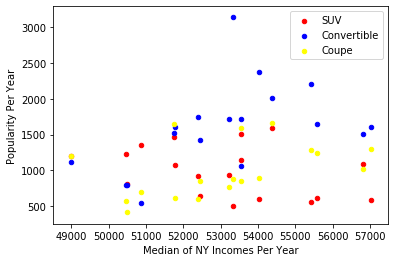

In [326]:
#scatter plot for Median of NY Incomes Per Year vs. Popularity Per Year
ax = Bfinal.plot(kind='scatter', x='Median_NY', y=Bfinal.columns[3], color='Red', label='SUV')
ax = Bfinal.plot(kind='scatter', x='Median_NY', y=Bfinal.columns[4], color='Blue', label='Convertible',ax=ax)
ax = Bfinal.plot(kind='scatter', x='Median_NY', y=Bfinal.columns[5], color='Yellow', label='Coupe',ax=ax)
ax.set_xlabel("Median of NY Incomes Per Year")
ax.set_ylabel("Popularity Per Year")

Text(0, 0.5, 'Popularity Per Year')

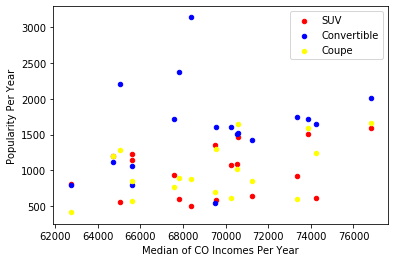

In [327]:
#scatter plot for Median of CO Incomes Per Year vs. Popularity Per Year
ax = Bfinal.plot(kind='scatter', x='Median_CO', y=Bfinal.columns[3], color='Red', label='SUV')
ax = Bfinal.plot(kind='scatter', x='Median_CO', y=Bfinal.columns[4], color='Blue', label='Convertible',ax=ax)
ax = Bfinal.plot(kind='scatter', x='Median_CO', y=Bfinal.columns[5], color='Yellow', label='Coupe',ax=ax)
ax.set_xlabel("Median of CO Incomes Per Year")
ax.set_ylabel("Popularity Per Year")